In [108]:
import numpy as np
from scipy import stats, optimize
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
N = 500
x_max = 50
x = np.linspace(0, x_max, N)
y = 0.5 * x + scipy.stats.norm(0, 0.2).rvs(size=N)

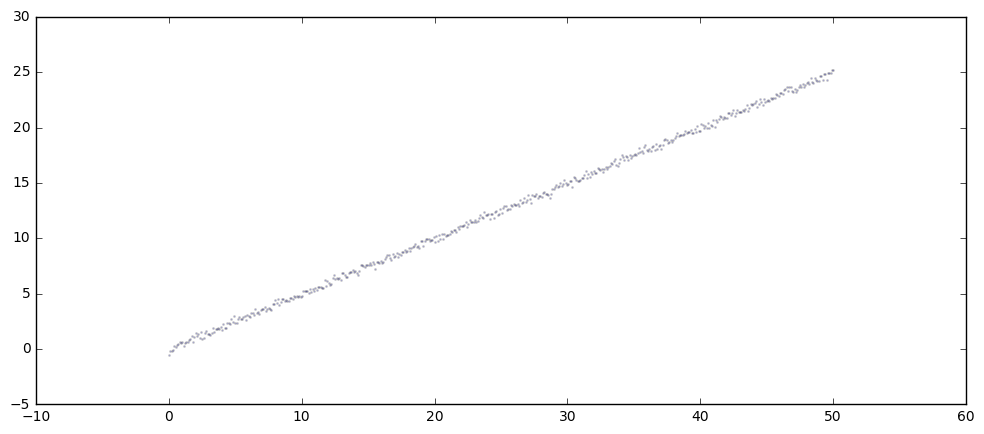

In [110]:
plt.figure(figsize=(12, 5))
plt.scatter(x, y, s=1, alpha=0.2)
plt.show()

In [111]:
def f_mse(args):
    y_pred = args[0] * x + args[1]
    return np.sqrt(np.sum((y - y_pred)**2)) / N

predicted values:
k = 0.500132448772 
b = 0.000629117159093


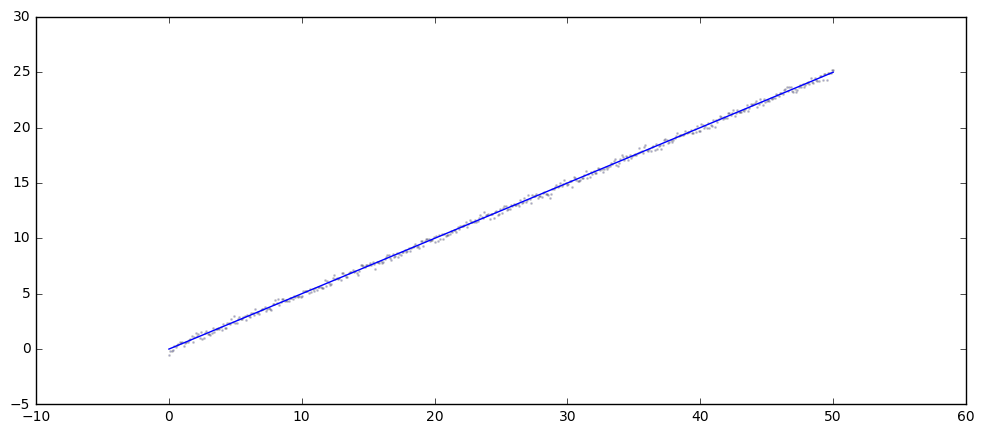

In [112]:
k, b = optimize.minimize(f_mse, [0., 0.]).x
print "predicted values:\n", "k =", k, "\nb =", b
y_pred = k * x + b
plt.figure(figsize=(12, 5))
plt.plot(x, y_pred)
plt.scatter(x, y, s=1, alpha=0.2)
plt.show()

In [113]:
N_noise = 75
x_noise = stats.uniform(0, x_max).rvs(size=N_noise)
y_noise = stats.norm(0, 0.2).rvs(size=N_noise) - 1

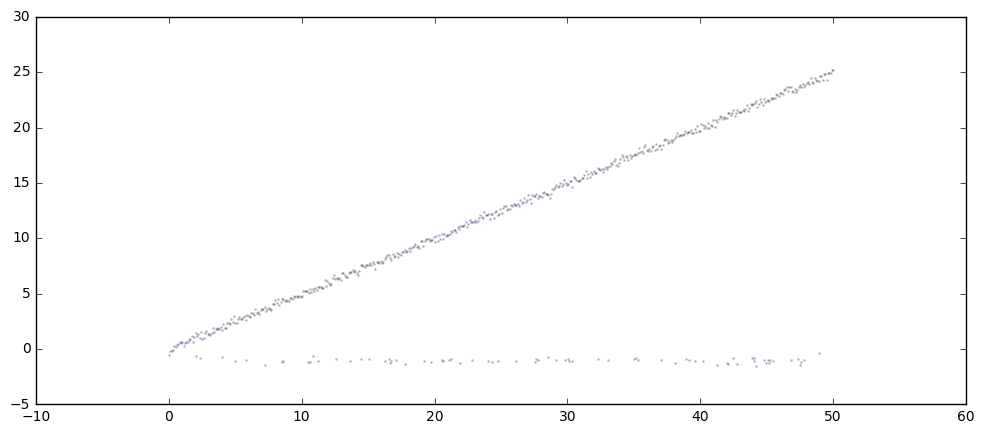

In [114]:
x = np.hstack((x, x_noise))
y = np.hstack((y, y_noise))
plt.figure(figsize=(12, 5))
plt.scatter(x, y, s=1, alpha=0.2)
plt.show()

predicted values:
k = 0.413302938564 
b = 0.230826477777


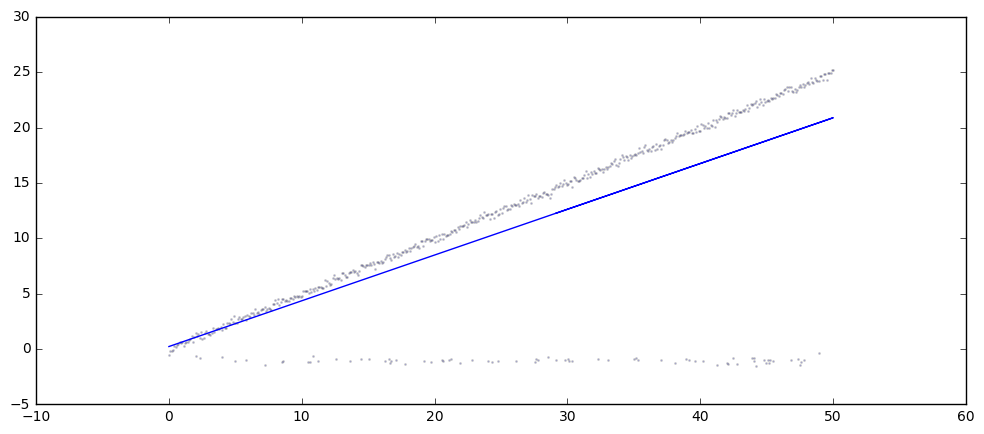

In [115]:
k, b = optimize.minimize(f_mse, [0., 0.]).x
print "predicted values:\n", "k =", k, "\nb =", b
y_pred = k * x + b
plt.figure(figsize=(12, 5))
plt.plot(x, y_pred)
plt.scatter(x, y, s=1, alpha=0.2)
plt.show()

In [116]:
def f_mae(args):
    y_pred = args[0] * x + args[1]
    return np.sum(np.abs(y - y_pred)) / N

predicted values:
k = 0.498856362874 
b = -0.00219012090693


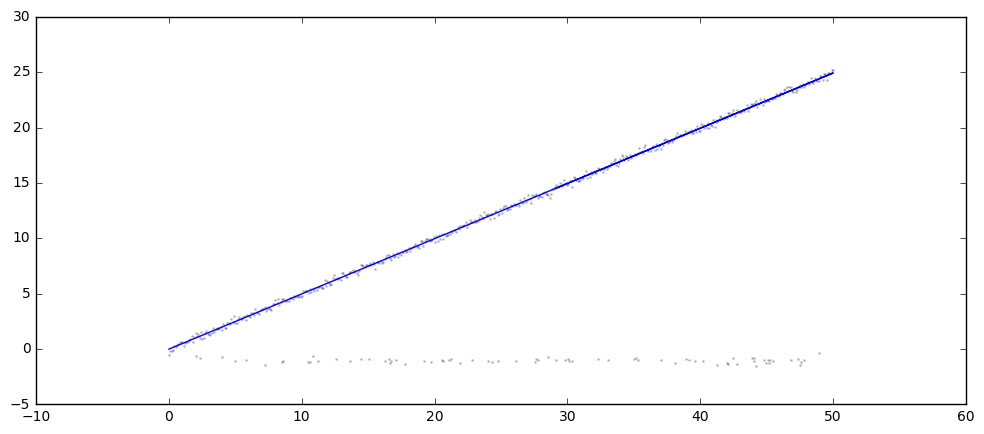

In [118]:
k, b = optimize.minimize(f_mae, [0., 0.]).x
print "predicted values:\n", "k =", k, "\nb =", b
y_pred = k * x + b
plt.figure(figsize=(12, 5))
plt.plot(x, y_pred)
plt.scatter(x, y, s=1, alpha=0.2)
plt.show()

## Выводы
Видно, что если выбрать в качестве метрики MAE, то восстановленная зависимость практически не зависит от выбросов, а в случае MSE полученная прямая сильно скошена в сторону шума. Это подтверждается теоретически, ведь, минимизируя MAE, мы оцениваем медиану, которая как раз не чувствительная к небольшому количеству выбросов.